<a href="https://colab.research.google.com/github/deepanshu2415/Capstone-1_EDA/blob/main/Group_EDA_Capstone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
Explore and analyze the data to discover important factors that govern the bookings.**

In [ ]:
#importing all the important liabraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive                    # Mounting drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Hotel_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/material_almabetter/Capstone Project-1 (EDA)/Hotel Bookings.csv')


In [ ]:
# seeing a sample of dataset

Hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
Hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# creating a copy for analysing dataset
df1 = Hotel_df.copy()
df1 = pd.DataFrame(df1)
df1.reset_index()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,City Hotel,0,23,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,119386,City Hotel,0,102,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,119387,City Hotel,0,34,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,119388,City Hotel,0,109,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# fetching column names 
column_name=df1.columns
column_name 

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## **cleaning dataset**

In [ ]:
# basic analysis
Hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#checking for duplicate rowa
duplicate = df1[df1.duplicated()]
duplicate.shape

(31994, 32)

In [ ]:
df1.drop_duplicates(inplace=True)

In [ ]:
df1.shape

(87396, 32)

In [ ]:
#checking for null values
df1.isna().sum().sort_values(ascending=False)[:7]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
booking_changes           0
dtype: int64

In [ ]:
# handling null value one by one 
df1['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [ ]:
# null value might represent that booking is not done with help of agent
# replacing nan by 0 
df1['agent'].fillna(0,inplace=True)

In [ ]:
# similarly with company
df1['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [ ]:
df1['company'].fillna(0,inplace=True)

In [ ]:
df1['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [ ]:
# replacing nan value by string 
df1['country'].fillna('others',inplace=True)

In [ ]:
df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [ ]:
# as 0 is availbale so nan might be typing error
df1['children'].fillna(0,inplace=True)

In [ ]:
# we have handled all the missing values

df1.isna().sum().sort_values(ascending=False)[:7]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
customer_type                  0
dtype: int64

#  performances of Hotel

**Q1) Fiding which type of hotel have more number of cancellation ?**

In [ ]:
# fetching required columns

df1[['hotel','is_canceled']]

,hotel,is_canceled
0,Resort Hotel,0
1,Resort Hotel,0
2,Resort Hotel,0
3,Resort Hotel,0
4,Resort Hotel,0
...,...,...
119385,City Hotel,0
119386,City Hotel,0
119387,City Hotel,0
119388,City Hotel,0


In [ ]:
#creating required dataframe
df2=df1.groupby(['hotel','is_canceled'])['is_canceled'].count().unstack()
df2=pd.DataFrame(df2)
df2.rename(columns = {0:"not canceled",1:"canceled"},inplace=True)
df2

is_canceled,not canceled,canceled
hotel,,
City Hotel,37379,16049
Resort Hotel,25992,7976




1.   created dataframe of required columns
2.   fetched the count of cancellation and non-cancellation



cancellation percentage of city hotel is 30.03855656210227
cancellation percentage of Resort hotel is 23.480923221855864


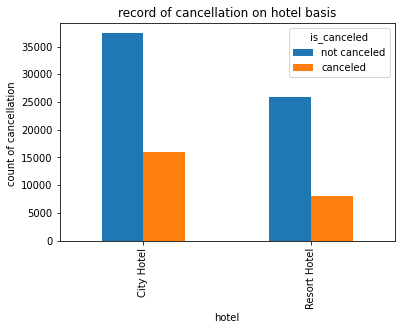

In [ ]:
#fetching and storing values in new variable
#C_H = city hotel
#R_H = resort hotel
C_H_not_cancelled = df2.iloc[0][0]
C_H_cancelled = df2.iloc[0][1]

R_H_not_cancelled = df2.iloc[1][0]
R_H_cancelled = df2.iloc[1][1]

#visualising data on bar graph
df2.plot(kind="bar")
plt.title("record of cancellation on hotel basis")
plt.ylabel('count of cancellation ')


# finding the ratio of cancellation according to hotels
City_hotel_cancellation_percentage = (C_H_cancelled/(C_H_not_cancelled+C_H_cancelled))*100
print(f'cancellation percentage of city hotel is {City_hotel_cancellation_percentage}')

Resort_hotel_cancellation_percentage = (R_H_cancelled/(R_H_not_cancelled+R_H_cancelled))*100
print(f'cancellation percentage of Resort hotel is {Resort_hotel_cancellation_percentage}')


**Q2) Analysing average number of people stay?**

In [ ]:
# data of years available
df1['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
# Adding total people as column, i.e. total people = num of adults + children + babies
df1['total_people'] = df1['adults']+df1['children']+df1['babies']
df1['total_people']=df1['total_people'].astype(int)

Text(0, 0.5, 'count of people')

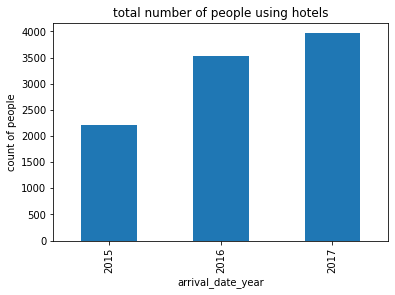

In [ ]:
# creating variable to store mean of people staying 
# grouping year and month data
# counting number of people staying
# at last finding the mean

people_stayed=(df1.groupby(['arrival_date_year','arrival_date_month'])['total_people'].count().unstack()).mean(axis=1,skipna=True)

people_stayed.plot(kind = 'bar')
plt.title("total number of people using hotels")
plt.ylabel("count of people")

**Observation**

1.   city hotel have greater percentage of cancellation
2.   city hotel also have comparetively larger number of booking than resort hotel

3. their were more people staying in hotel in 2017 

#  distribution channel report

**Q3)which distribution chanel have contributed most?**

In [ ]:
# checking for various distribution channel present
df1['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

Text(0.5, 1.0, 'distribution channel contribution')

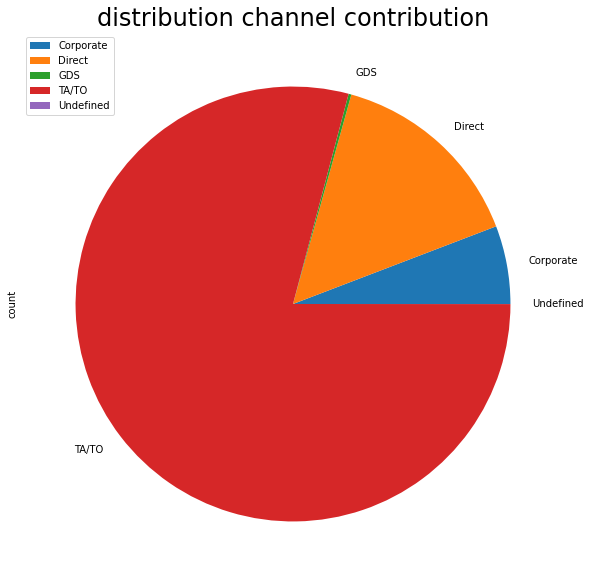

In [ ]:
# D_C = distribution_channel

D_C=df1.groupby(['distribution_channel'])['distribution_channel'].count()
D_C=pd.DataFrame(D_C)
D_C.rename(columns={'distribution_channel': "count"},inplace=True)

# plotting a pie chart to check the contribution
D_C.plot.pie(y='count',figsize=(10, 10))
plt.title('distribution channel contribution',fontsize=24)

**Q4) Which channel have more repeated customer after TA/TO**





In [ ]:

rep=df1.groupby(['distribution_channel','is_repeated_guest'])['is_repeated_guest'].count().unstack()
rep=pd.DataFrame(rep)
rep.rename(columns={0:'repeated',1:'not repeated'},inplace=True)

# dropping TA/TO column as its clear it have more contribution thus have most repeated customer
rep=rep.drop(['TA/TO'])


Text(0.5, 1.0, 'most repeated customer through distribution channel after TA/TO')

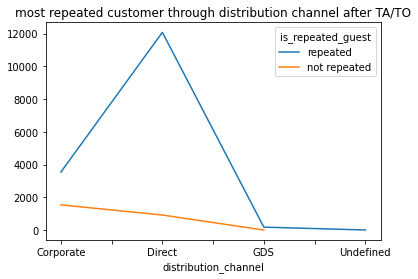

In [ ]:
rep.plot(kind='line')
plt.title('most repeated customer through distribution channel after TA/TO')


**Observation**

1.   TA/TO have the most contribution 
2.   TA/TO even have the most number of repeated guests


3.   direct channel have most repeated guest after TA/TO

















# Q5)Agent with most number of bookings

Text(0, 0.5, 'number of bookings')

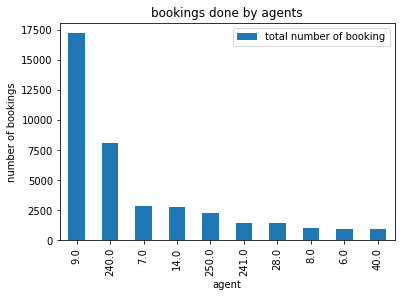

In [ ]:
# filtering data with no cancellation
d1= df1[df1['is_canceled']==0]

# counting number of booking done by agent
agent_data=d1.groupby(['agent'])['agent'].count()
agent_data = pd.DataFrame(agent_data)

# dropping the booking data which is not done by agent
agent_data.drop(0.0,inplace=True)
agent_data.rename(columns={'agent':"total number of booking"},inplace=True)

# sorting values to find most number of booking done by agent
agent_data.sort_values(by=['total number of booking'],ascending=False,inplace=True)
agent_data=agent_data.iloc[:10]

# plotting the data on bar graph
agent_data.plot(kind='bar')
plt.title("bookings done by agents")
plt.ylabel("number of bookings")

**Observation**

1.   agent with id number 9 have made the max no of booking




**Q6) checking if some columns showing any relation**

In [ ]:
agent_data=pd.DataFrame(agent_data)

,total number of booking
agent,
9.0,17235
240.0,8084
7.0,2864
14.0,2766
250.0,2285
241.0,1426
28.0,1415
8.0,998
6.0,939


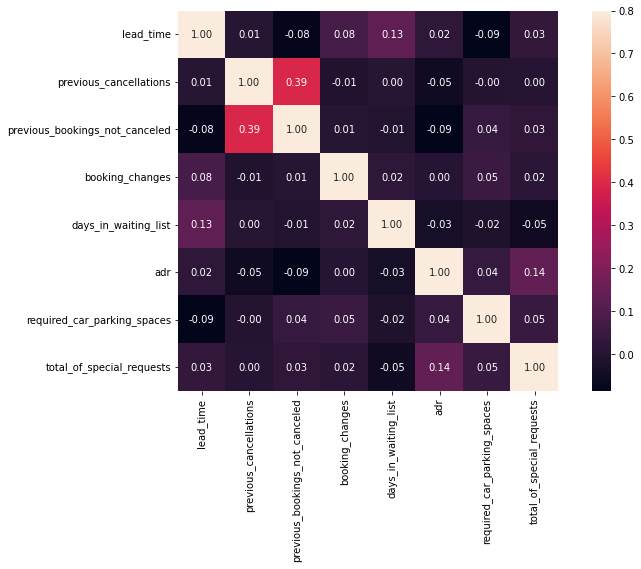

In [ ]:
num_df1 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']]

#correlation matrix
corrmat = num_df1.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

1) Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.

2) adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

# Room insights

**Q7) checking which room is in more demand**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


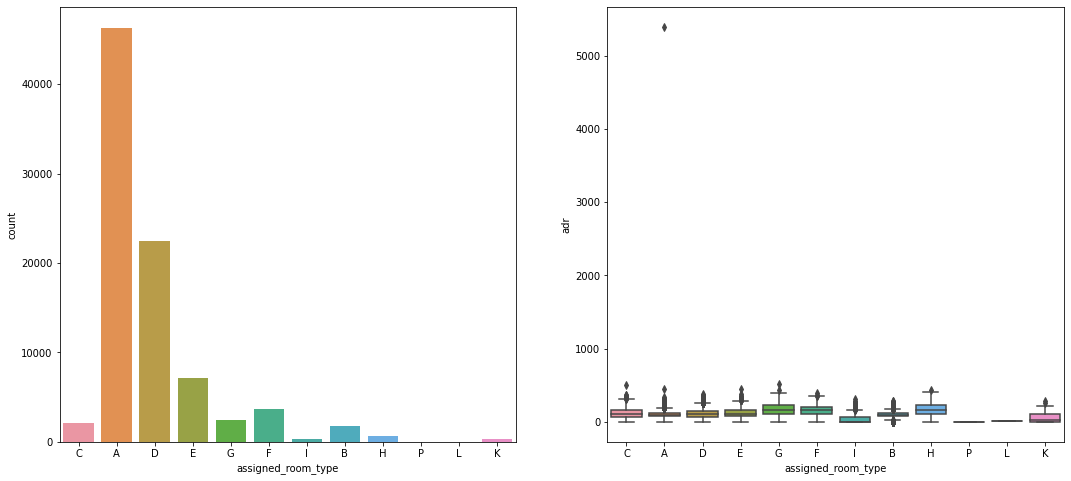

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = df1.groupby('assigned_room_type')
d1['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = df1['assigned_room_type'])
sns.boxplot(ax = axes[1], x = df1['assigned_room_type'], y = df1['adr'])
plt.show()

type A Room is in most demand

**Q8) checking for affect of waiting timing**

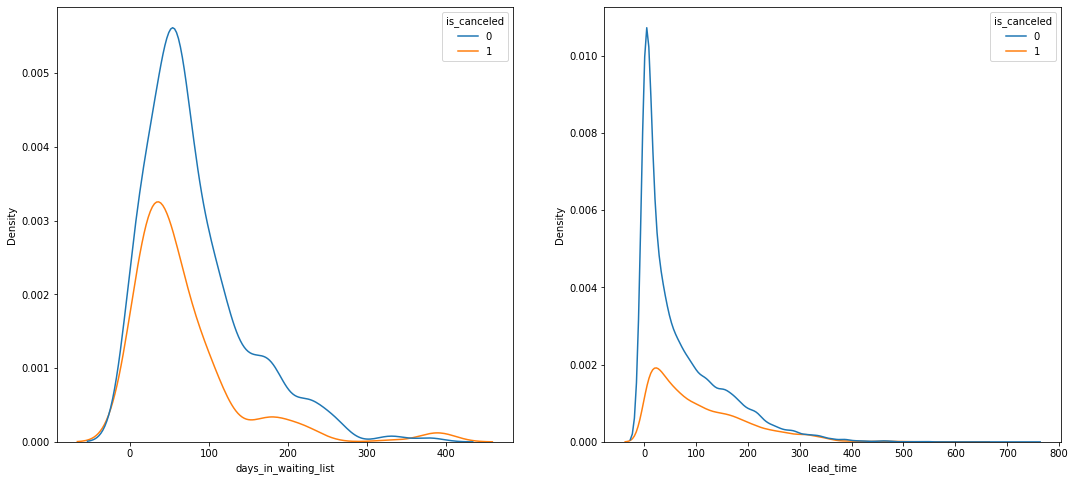

In [ ]:
waiting_bookings = df1[df1['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time


fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = df1['lead_time'], hue = df1['is_canceled'])
plt.show()

waiting time is showing almost no affect on cancellation

check whether not getting allotted the same room type as demanded is the cause of cancellation fo bookings

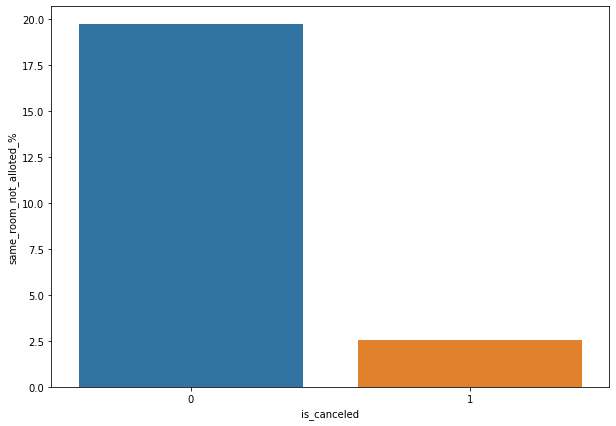

In [ ]:
def check_room_allot(x):
  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0

df1['same_room_not_alloted'] = df1.apply(lambda x : check_room_allot(x), axis = 1)
grp_by_canc = df1.groupby('is_canceled')

D3 = pd.DataFrame((grp_by_canc['same_room_not_alloted'].sum()/grp_by_canc.size())*100).rename(columns = {0: 'same_room_not_alloted_%'})
plt.figure(figsize = (10,7))
sns.barplot(x = D3.index, y = D3['same_room_not_alloted_%'])
plt.show()